### A) Conditioning on **parameters** (statistics / ML)

$$
\boxed{
p(\text{data} \mid \mu, \Sigma)
}
$$

Meaning:

* “The probability of the data **given fixed parameters**”
* $\mu,\Sigma$ are **not random**
* This is a **likelihood function**

You are asking:

> “If the distribution were $\mathcal{N}(\mu,\Sigma)$, how likely is the data?”

---

### B) Conditioning on **random variables** (probability / Bayes)

$$
\boxed{
p(x \mid y)
}
$$

Meaning:

* $x$ and $y$ are **both random variables**
* $y$ is observed
* $x$ is uncertain
* Result is a **new distribution over $x$**

This is **inference**, not parameter fitting.

---

## 2️⃣ Why both notations are correct

They answer **different questions**.

| Expression                | Question it answers                                       |
| ------------------------- | --------------------------------------------------------- |
| $p(data \mid \mu,\Sigma)$ | “How likely is this data under these parameters?”         |
| $p(x \mid y)$             | “Given that I observed $y$, what do I believe about $x$?” |

---

## 3️⃣ What is $\mu,\Sigma$ in $p(x \mid y)$ then?

They are **hidden inside the joint distribution**.

You start with:

$$
\begin{bmatrix}
x \\
y
\end{bmatrix}
\sim
\mathcal{N}
\left(
\begin{bmatrix}
\mu_x \\
\mu_y
\end{bmatrix},
\begin{bmatrix}
\Sigma_{xx} & \Sigma_{xy} \\
\Sigma_{yx} & \Sigma_{yy}
\end{bmatrix}
\right)
$$

Then:

$$p(x \mid y)=\frac{p(x,y)}{p(y)}$$

The parameters are **still there**, just implicit.

---

## 4️⃣ Concrete example (anchors intuition)

### Case 1 — Likelihood of data

You model sensor noise:

$$
z \sim \mathcal{N}(h(x), \Sigma)
$$

You evaluate:

$$
\boxed{
p(z \mid x)
}
$$

This is a **likelihood**, used for optimization.

---

### Case 2 — Inference of a hidden variable

You model joint uncertainty:

$$
(x, y) \sim \mathcal{N}(\mu, \Sigma)
$$

You observe $y=y_0$ and compute:

$$
\boxed{
p(x \mid y=y_0)
}
$$

This is **posterior inference**.

---

## 5️⃣ Why this matters in SLAM / Kalman filtering

In Kalman filtering:

* State: $x$
* Measurement: $z$

You write:

$$
\boxed{
p(z \mid x)
}
$$

But when you update the belief, you compute:

$$
\boxed{
p(x \mid z)
}
$$

Same ingredients — **different direction**.

Bayes rule connects them:

$$\boxed{p(x \mid z)=\frac{p(z \mid x)p(x)}{p(z)}}$$

---

## 6️⃣ Why your intuition feels conflicted

Because textbooks often **mix languages**:

* ML books talk about **likelihood**
* Probability books talk about **conditional distributions**
* Robotics mixes both constantly

But the rule is simple:

> **Parameters are fixed. Variables are random.**

---

## 7️⃣ Final mental model (lock this in)

### Think in terms of roles:

| Symbol                    | Role                     |
| ------------------------- | ------------------------ |
| $x,y,z$                   | Random variables         |
| $\mu,\Sigma$              | Model parameters         |
| $p(data \mid \mu,\Sigma)$ | Likelihood               |
| $p(x \mid y)$             | Conditional distribution |
| $p(x \mid z)$             | Posterior                |

---

## 8️⃣ One sentence summary (important)

> $p(data \mid \mu,\Sigma)$ scores data under a model,
> $p(x \mid y)$ **changes your belief** about one variable after observing another.

---


---

## 1️⃣ One formula, two interpretations

Start with the Gaussian density:

$$
p(x \mid \mu, \Sigma) = 
\frac{1}{\sqrt{(2\pi)^d \det\Sigma}}
\exp\left(
-\frac{1}{2}
(x-\mu)^\top \Sigma^{-1} (x-\mu)
\right)
$$



This expression **never changes**.

What changes is:

* **what is fixed**
* **what is unknown**
* **what question you are asking**

---

## 2️⃣ Probability (predictive view)

### Question being asked

> “If the parameters are known, how likely is a value?”

### Interpretation

* $\mu,\Sigma$ are **fixed**
* $x$ is **random**

$$
\boxed{
\text{Probability view: } p(x \mid \mu,\Sigma)
}
$$

You integrate over $x$:

$$
\int p(x \mid \mu,\Sigma),dx = 1
$$

This is a **true probability distribution**.

---

## 3️⃣ Likelihood (inverse view)

### Question being asked

> “Given observed data, which parameters explain it best?”

### Interpretation

* $x$ is **fixed (observed)**
* $\mu,\Sigma$ are **unknown**

You *reuse the same formula* but reinterpret it as:

$$
\boxed{
\mathcal{L}(\mu,\Sigma \mid x)
\triangleq
p(x \mid \mu,\Sigma)
}
$$

Now:

* This is **not a probability distribution**
* It does **not integrate to 1 over $\mu,\Sigma$**
* It is a **score function**

---

## 4️⃣ This is the key mental switch

> **Probability asks about data given parameters**
> **Likelihood asks about parameters given data**

Same formula. Different roles.

---

## 5️⃣ Why likelihood is not a probability

Take a fixed observation $x_0$.

As a function of $\mu$:

$$\mathcal{L}(\mu \mid x_0)=p(x_0 \mid \mu) $$

This:

* does **not** integrate to 1 over $\mu$
* can be larger than 1
* is only meaningful **up to proportionality**

That is why we maximize likelihood instead of integrating it.

---

## 6️⃣ Bayesian view: where probability of parameters appears

If you want a **probability distribution over parameters**, you must add a prior:

$$\boxed{p(\mu \mid x)=\frac{p(x \mid \mu),p(\mu)}{p(x)}}
$$

Now:

* $p(\mu \mid x)$ **is** a probability
* integrates to 1
* combines **likelihood + prior**

This is Bayesian inference.

---

## 7️⃣ How this relates to $p(x \mid y)$

In:

$$
p(x \mid y)
$$

* $x$ and $y$ are **both random variables**
* this is **always a probability**
* no parameters are being optimized

So:

| Expression                       | What it is                  |
| -------------------------------- | --------------------------- |
| $p(x \mid \mu,\Sigma)$           | Probability *or* likelihood |
| $\mathcal{L}(\mu,\Sigma \mid x)$ | Likelihood                  |
| $p(x \mid y)$                    | Conditional probability     |
| $p(\mu \mid x)$                  | Posterior probability       |

---

## 8️⃣ Why SLAM and least squares use likelihood

In SLAM:

$$
z = h(x) + \epsilon,\quad \epsilon \sim \mathcal{N}(0,\Sigma)
$$

You write:

$$
\boxed{
p(z \mid x)
}
$$

This is a **likelihood in $x$**, not a probability in $x$.

Taking log:

$$\log p(z \mid x)=-\frac{1}{2}\boxed{$r^\top \Sigma^{-1} r$}* \text{const}  $$

That boxed term becomes your least-squares cost.

---

## 9️⃣ One-sentence rule (lock this in)

> **If the variable integrates to 1 → probability**
> **If you optimize it → likelihood**

---

## 🔟 Final intuition (very important)

You are **not changing mathematics**
You are **changing perspective**

Same formula.
Different question.

Once this clicks, MAP, Kalman filters, SLAM, and factor graphs all become much easier.




1. **Probability density**: vary $x$, fix $\mu,\sigma$
2. **Likelihood**: fix observed $x_0$, vary $\mu$ (treat $\mu$ as variable)

---

## 1️⃣ Your Gaussian function (slightly cleaned)

We’ll keep your function and add the normalization so it is a true PDF:

$$
\boxed{p(x \mid \mu,\sigma) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)}
$$


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sig):
    return (1.0 / (np.sqrt(2 * np.pi) * sig)) * \
           np.exp(-0.5 * ((x - mu) / sig)**2)

---

## 2️⃣ Probability density plot (x is random)

Here:

* $\mu,\sigma$ are fixed
* $x$ varies
* This **integrates to 1**



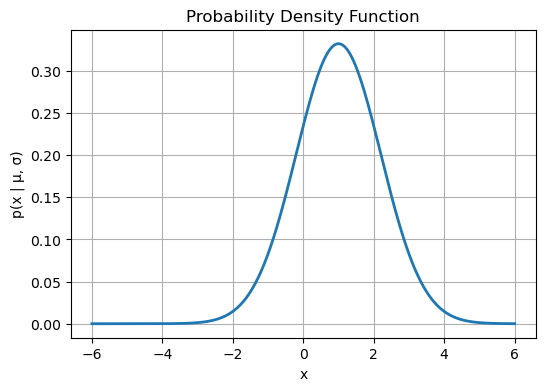

In [7]:
x = np.linspace(-6, 6, 1000)
mu = 1.0
sig = 1.2

p_x = gaussian(x, mu, sig)

plt.figure(figsize=(6, 4))
plt.plot(x, p_x, linewidth=2)
plt.xlabel("x")
plt.ylabel("p(x | μ, σ)")
plt.title("Probability Density Function")
plt.grid(True)
plt.show()

### Interpretation

This answers:

> “If the parameters are $\mu=1,\sigma=1.2$, how likely are different values of $x$?”

---

## 3️⃣ Likelihood plot (μ is variable)

Now we **freeze the observed data point**:

$$
x_0 = 2.0
$$

and vary $\mu$.

Mathematically:

$$\boxed{\mathcal{L}(\mu \mid x_0)=p(x_0 \mid \mu,\sigma)}$$



In [ ]:
mu_vals = np.linspace(-6, 6, 1000)
x0 = 2.0
sig = 1.2

likelihood = gaussian(x0, mu_vals, sig)

plt.figure(figsize=(6, 4))
plt.plot(mu_vals, likelihood, linewidth=2)
plt.xlabel("μ")
plt.ylabel("L(μ | x₀)")
plt.title("Likelihood Function")
plt.grid(True)
plt.show()

### Interpretation

This answers:

> “Given that I observed $x_0=2$, which $\mu$ explains it best?”

---

## 4️⃣ Critical observation (this is the punchline)

* **The curves look identical**
* **The math is identical**
* **The meaning is completely different**

| Plot        | Variable | Fixed        | Meaning                |
| ----------- | -------- | ------------ | ---------------------- |
| Probability | $x$      | $\mu,\sigma$ | Distribution over data |
| Likelihood  | $\mu$    | $x_0,\sigma$ | Score over parameters  |

---

## 5️⃣ Why likelihood is not a probability

Try integrating the likelihood over $\mu$:

```python
np.trapz(likelihood, mu_vals)
```

It will **not equal 1**.

That’s why likelihood:

* is not a probability
* is maximized, not integrated

---

## 6️⃣ One-line mental rule (lock this in)

> **Same formula, different question**
> **Probability varies data**
> **Likelihood varies parameters**

---

## 1️⃣ Likelihood does **not** mean "only $\mu$ is variable"

The definition of likelihood is:

$$
\boxed{
\mathcal{L}(\theta \mid x_0) \triangleq p(x_0 \mid \theta)
}
$$

where:

* $x_0$ is **observed data** (fixed)
* $\theta$ is **the set of unknown parameters**

---

## 2️⃣ In a 1D Gaussian, the parameters are

$$
\theta = \{\mu,\sigma\}
$$

So the **full likelihood** is actually:

$$
\boxed{
\mathcal{L}(\mu,\sigma \mid x_0) = p(x_0 \mid \mu,\sigma)
}
$$

Nothing is missing.

---

## 3️⃣ Why we *often* write $\mathcal{L}(\mu \mid x_0)$

This is a **choice**, not a rule.

In your plot example, we **decided** to:

* treat $\sigma$ as known
* estimate only $\mu$

So we implicitly fixed $\sigma$ and wrote:

$$
\boxed{
\mathcal{L}(\mu \mid x_0) = p(x_0 \mid \mu,\sigma_{\text{fixed}})
}
$$

That's why $\sigma$ does not appear as a variable.

> Likelihood notation usually hides fixed parameters.

---

## 4️⃣ You could just as well estimate $\sigma$

If $\mu$ is fixed and $\sigma$ is unknown:

$$
\boxed{
\mathcal{L}(\sigma \mid x_0) = p(x_0 \mid \mu,\sigma)
}
$$

Now **$\sigma$ is the variable**.

Or both:

$$
\boxed{
\mathcal{L}(\mu,\sigma \mid x_0) = p(x_0 \mid \mu,\sigma)
}
$$

This is a **2D likelihood surface**.

---

## 5️⃣ Why textbooks often focus on $\mu$

Three practical reasons:

### ① Pedagogy

* 1D curve is easy to visualize
* 2D likelihood surfaces are harder

### ② Common assumptions

* Noise level $\sigma$ often comes from sensor specs
* Engineers fix $\sigma$ and estimate $\mu$

### ③ Optimization convenience

* Many estimators assume known covariance
* This leads directly to least squares

---

## 6️⃣ Important distinction (this is key)

| Role                               | Fixed        | Variable     |
| ---------------------------------- | ------------ | ------------ |
| Probability $p(x \mid \mu,\sigma)$  | $\mu,\sigma$ | $x$          |
| Likelihood $\mathcal{L}(\mu,\sigma \mid x_0)$ | $x_0$        | $\mu,\sigma$ |
| Your example                       | $x_0,\sigma$ | $\mu$        |

So **$\sigma$ is not "missing"** — it's **conditioned on**.

---

## 7️⃣ One-sentence rule (lock this in)

> **Likelihood varies the unknowns, not the data**

Whatever you are trying to estimate becomes the variable of the likelihood.

---

## 8️⃣ SLAM / robotics connection (important)

In SLAM we usually write:

$$
\boxed{
p(z \mid x,\Sigma)
}
$$

and treat:

* $z$ fixed $=$ measurement
* $x$ variable $=$ state
* $\Sigma$ fixed $=$ noise model

That is **exactly the same pattern**.

---

## 9️⃣ Final clarity check

❌ Likelihood variable is always $\mu$
✅ Likelihood variable is **whatever parameter is unknown**
✅ $\sigma$ disappears only because **you fixed it**

---




## Mean and Covariance of a Conditional Gaussian

---

## Setup (joint Gaussian)

Assume a **joint Gaussian** over two random vectors $x$ and $y$:

$$
\begin{bmatrix}
x \\
y
\end{bmatrix}
\sim
\mathcal{N}
\left(
\begin{bmatrix}
\mu_x \\
\mu_y
\end{bmatrix},
\begin{bmatrix}
\Sigma_{xx} & \Sigma_{xy} \\
\Sigma_{yx} & \Sigma_{yy}
\end{bmatrix}
\right)
$$

Here:

* $x \in \mathbb{R}^n$
* $y \in \mathbb{R}^m$

---

## Conditional distribution $p(x \mid y)$

The conditional is **still Gaussian**:

$$
\boxed{
p(x \mid y) = \mathcal{N}\left(\mu_{x\mid y}, \Sigma_{x\mid y}\right)
}
$$

---

## ✅ Conditional mean (this is what you asked for)

$$
\boxed{
\mu_{x\mid y} = \mu_x + \Sigma_{xy}\Sigma_{yy}^{-1}(y - \mu_y)
}
$$

---

## ✅ Conditional covariance (for completeness)

$$
\boxed{
\Sigma_{x\mid y} = \Sigma_{xx} - \Sigma_{xy}\Sigma_{yy}^{-1}\Sigma_{yx}
}
$$

---

## Very important intuition (do not skip)

### Mean update

* Starts from the prior mean $\mu_x$
* Shifts **toward values consistent with $y$**
* Shift direction and strength controlled by cross-covariance $\Sigma_{xy}$

This is **exactly a correction term**.

---

### Covariance update

* Always **shrinks or stays the same**
* Conditioning can **never increase uncertainty**
* Reduction amount depends on how informative $y$ is

---

## Scalar special case (1D intuition)

If $x,y$ are scalars:

$$
\mu_{x\mid y} = \mu_x + \frac{\sigma_{xy}}{\sigma_y^2}(y - \mu_y)
$$

$$
\sigma_{x\mid y}^2 = \sigma_x^2 - \frac{\sigma_{xy}^2}{\sigma_y^2}
$$

---

## Critical connection (Kalman filter)

If you rename:

* $\Sigma_{xy}\Sigma_{yy}^{-1}$ → **Kalman gain**
* $y - \mu_y$ → **innovation**

then the mean equation becomes:

$$
\boxed{
\mu_{x\mid y} = \mu_x + K(y - \mu_y)
}
$$

This is why Kalman filtering is **just conditional Gaussians**.

---

## One-line takeaway (lock this in)

> **Conditional mean = prior mean + covariance-weighted correction**
> **Conditional covariance = prior covariance − explained uncertainty**




## Example 1: Robot Localization


Let's create a physical example in the context of robotics that illustrates the conditional distribution of one variable given another when they follow a joint Gaussian distribution.

### Scenario: Robot Localization

Imagine a robot navigating a two-dimensional space, equipped with a GPS sensor and a compass. The robot's state can be described by two variables:
1. $ x $: The robot's position along the x-axis.
2. $ y $: The robot's heading angle (orientation) measured by the compass.

The robot's state vector is:
$ \mathbf{z} = \begin{bmatrix} x \\ y \end{bmatrix} $

Due to sensor noise and environmental factors, both $ x $ and $ y $ are random variables and are jointly Gaussian distributed.

### Joint Gaussian Distribution

Assume the robot's state follows this joint Gaussian distribution:
$ \mathbf{z} \sim \mathcal{N} \left( \begin{bmatrix} 5 \\ 0 \end{bmatrix}, \begin{bmatrix} 2 & 0.5 \\ 0.5 & 1 \end{bmatrix} \right) $

- Mean position ($ x $): 5 meters along the x-axis.
- Mean heading ($ y $): 0 radians (pointing straight forward).
- Variance in position: 2 $(\text{meters}^2)$
- Variance in heading: 1 $(\text{radians}^2)$
- Covariance between position and heading: 0.5

### Problem

Given a specific heading measurement, $ y = y_0 $, we want to find the conditional distribution of the robot's position $ x $.

### Conditional Distribution Calculation

#### 1. Extract Parameters

From the joint distribution:
$ \mathbf{\mu_z} = \begin{bmatrix} 5 \\ 0 \end{bmatrix} $
$ \mathbf{\Sigma_z} = \begin{bmatrix} 2 & 0.5 \\ 0.5 & 1 \end{bmatrix} $

#### 2. Conditional Mean

The conditional mean of $ x $ given $ y = y_0 $:
$ \mu_{x|y} = \mu_x + \Sigma_{xy} \Sigma_{yy}^{-1} (y_0 - \mu_y) $

Plugging in the values:
- $\mu_x = 5$
- $\mu_y = 0$
- $\Sigma_{xy} = 0.5$
- $\Sigma_{yy} = 1$

$ \mu_{x|y} = 5 + 0.5 \cdot 1^{-1} (y_0 - 0) = 5 + 0.5 \cdot y_0 $

#### 3. Conditional Covariance

The conditional covariance of $ x $ given $ y $:
$ \Sigma_{x|y} = \Sigma_{xx} - \Sigma_{xy} \Sigma_{yy}^{-1} \Sigma_{yx} $

Plugging in the values:
- $\Sigma_{xx} = 2$
- $\Sigma_{xy} = 0.5$
- $\Sigma_{yy} = 1$

$ \Sigma_{x|y} = 2 - 0.5 \cdot 1^{-1} \cdot 0.5 = 2 - 0.25 = 1.75 $

### Conditional Distribution

Given $ y = y_0 $, the conditional distribution of $ x $ is:
$ x | y = y_0 \sim \mathcal{N} \left( 5 + 0.5 y_0, 1.75 \right) $

### Physical Interpretation

1. **Prior Distribution:**
   - Before any heading measurement, the robot's position $ x $ is normally distributed with mean 5 meters and variance 2 $(\text{meters}^2)$.
   - The heading $ y $ is normally distributed with mean 0 radians and variance 1 $(\text{radians}^2)$.

2. **Conditional Distribution:**
   - Once the robot measures its heading $ y = y_0 $, it updates its belief about its position $ x $.
   - The new mean position $ x $ is adjusted based on the measured heading $ y_0 $, specifically by the amount $ 0.5 y_0 $.
   - The uncertainty (variance) about the position $ x $ is reduced to 1.75 $(\text{meters}^2)$.

### Example Calculation

Suppose the robot measures its heading to be $ y_0 = 2 $ radians.

1. **Conditional Mean:**
   $ \mu_{x|y} = 5 + 0.5 \cdot 2 = 5 + 1 = 6 $

2. **Conditional Covariance:**
   $ \Sigma_{x|y} = 1.75 $

Given this heading measurement, the robot's updated belief about its position is:
$ x | y = 2 \sim \mathcal{N} \left( 6, 1.75 \right) $

This means the robot now believes it is centered around 6 meters along the x-axis, with a reduced uncertainty compared to before the heading measurement.

### Summary

- **Joint Distribution:** $\mathbf{z} = \begin{bmatrix} x \\ y \end{bmatrix} \sim \mathcal{N} \left( \begin{bmatrix} 5 \\ 0 \end{bmatrix}, \begin{bmatrix} 2 & 0.5 \\ 0.5 & 1 \end{bmatrix} \right)$
- **Conditional Distribution (given $ y = 2 $):** $ x | y = 2 \sim \mathcal{N} \left( 6, 1.75 \right) $

This example shows how a robot can use joint Gaussian properties to update its position estimate based on a heading measurement, reducing uncertainty in its localization process.


# 1️⃣ What you already did: conditional distribution (inference)

You started from a **joint Gaussian belief**:

$$
\begin{bmatrix}
x \\
y
\end{bmatrix}
\sim
\mathcal{N}
\left(
\begin{bmatrix}
5 \\
0
\end{bmatrix},
\begin{bmatrix}
2 & 0.5 \\
0.5 & 1
\end{bmatrix}
\right)
$$

Then you asked:

> "If I **observe** $y = y_0$, what is my belief about $x$?"

That is:

$$
\boxed{
p(x \mid y=y_0)
}
$$

You correctly derived:

$$
\boxed{
x \mid y=y_0 \sim \mathcal{N}
\left(
5 + 0.5 \cdot y_0,; 1.75
\right)
}
$$

This is **Bayesian inference**:

* $y$ is observed
* $x$ is random
* result is a **new probability distribution**

---

# 2️⃣ Now change ONLY the question → likelihood

Let's keep **the same robot, the same physics**, but ask a *different question*.

---

## Likelihood question

> "Suppose the robot is at position $x$.
> How likely is it that the compass would measure heading $y_0$?"

This is:

$$
\boxed{
p(y_0 \mid x)
}
$$

This is a **likelihood**, not a conditional belief.

---

# 3️⃣ Extract likelihood from your joint Gaussian

From the joint covariance:

$$
\Sigma =
\begin{bmatrix}
2 & 0.5 \\
0.5 & 1
\end{bmatrix}
$$

The conditional of $y$ given $x$ is also Gaussian:

---

## Likelihood model

$$
\boxed{
y \mid x \sim
\mathcal{N}
\left(
\mu_{y\mid x},;
\Sigma_{y\mid x}
\right)
}
$$

---

### Mean

$$
\boxed{
\mu_{y\mid x} = \mu_y + \Sigma_{yx}\Sigma_{xx}^{-1}(x - \mu_x)
}
$$

Plug in values:

$$
\mu_{y\mid x} = 0 + 0.5 \cdot 2^{-1} (x - 5) = 0.25(x - 5)
$$

---

### Variance

$$
\boxed{
\Sigma_{y\mid x} = \Sigma_{yy} - \Sigma_{yx}\Sigma_{xx}^{-1}\Sigma_{xy}
}
$$

$$
\Sigma_{y\mid x} = 1 - 0.5 \cdot 2^{-1} \cdot 0.5 = 1 - 0.125 = 0.875
$$

---

## Likelihood distribution

$$
\boxed{
p(y_0 \mid x) = \mathcal{N}
\left(
0.25(x - 5),; 0.875
\right)
}
$$

---

# 4️⃣ What changed conceptually?

| Aspect               | Conditional distribution | Likelihood     |
| -------------------- | ------------------------ | -------------- |
| Random variable      | $x$                      | $y$            |
| Fixed value          | $y_0$                    | $y_0$          |
| Variable             | $x$                      | $x$            |
| Result               | belief over $x$          | score over $x$ |
| Integrates to 1 over | $x$                      | ❌ does not     |

---

# 5️⃣ Physical interpretation (robotics intuition)

### Conditional $p(x \mid y_0)$

> "Given the compass reading, where do I think I am?"

✔ Used for **state estimation**

---

### Likelihood $p(y_0 \mid x)$

> "If I were at position $x$, how consistent is the compass reading?"

✔ Used for **optimization / scoring**

---

# 6️⃣ Why SLAM uses likelihoods

In SLAM we write:

$$
\boxed{
p(z \mid x)
}
$$

because:

* $z$ is a fixed measurement
* $x$ is what we optimize

Taking log:

$$
\boxed{
\log p(z \mid x) = -\frac{1}{2}(r^\top \Sigma^{-1} r) + \text{const}
}
$$

That is **least squares**.

---

# 7️⃣ Final mental rule (this resolves the confusion)

> **Conditional distribution updates beliefs**
> **Likelihood scores hypotheses**

Same Gaussian.
Same numbers.
Different question.

---



# Unifying Conditional Distribution, Likelihood, Kalman Filter, and Factor Graphs

Excellent — this is the **right moment** to unify everything:
**conditional distribution**, **likelihood**, **Kalman filter**, and **factor graphs** are *the same math*, used with *different intentions*.

I'll map **your exact robot example** to:

1. Kalman filter **prediction vs update**
2. A **factor graph factor**
3. Explicitly say **what is a probability** and **what is a likelihood** in each case

No new symbols unless necessary.

---

## 1️⃣ Your example, restated in estimation language

You had a **joint Gaussian belief** over:

* $x$ = robot position
* $y$ = robot heading (compass)

$$
\begin{bmatrix}
x \\
y
\end{bmatrix}
\sim
\mathcal{N}
\left(
\begin{bmatrix}
5 \\
0
\end{bmatrix},
\begin{bmatrix}
2 & 0.5 \\
0.5 & 1
\end{bmatrix}
\right)
$$

This already encodes:

* a **prior**
* a **correlation** between state and measurement

---

## 2️⃣ Mapping to Kalman filter (conceptual)

Kalman filter always has **two steps**:

---

### 🔵 Prediction step (prior)

> "Before seeing the measurement, what do I believe about the state?"

In your example, the **prior over $x$** is simply the marginal:

$$
\boxed{
p(x) = \mathcal{N}(5,;2)
}
$$

This corresponds to:

* No conditioning
* No likelihood
* Just **probability**

✔ **Pure probability distribution**

---

### 🔴 Update step (conditioning)

Now the robot **measures**:

$$
y = y_0
$$

Kalman asks:

> "Given this measurement, what is my updated belief about $x$?"

That is exactly what you computed:

$$
\boxed{
p(x \mid y=y_0) = \mathcal{N}\left(5 + 0.5 y_0,; 1.75\right)
}
$$

✔ This is the **Kalman update**
✔ This is a **conditional distribution**
✔ This is a **posterior**

---

### 🔑 Kalman filter form (explicit mapping)

Kalman update equation:

$$
\boxed{
\mu^{+} = \mu^{-} + K(y_0 - \mu_y)
}
$$

In your numbers:

* $\mu^{-} = 5$
* $\mu_y = 0$
* $K = \Sigma_{xy}\Sigma_{yy}^{-1} = 0.5$

So:

$$
\mu^{+} = 5 + 0.5 y_0
$$

✔ Exact match
✔ No new math
✔ Just a renamed conditional mean

---

## 3️⃣ Where likelihood enters (this is crucial)

Kalman filter **does not start** from the conditional.

It starts from **Bayes rule**:

$$
\boxed{
p(x \mid y_0) \propto p(y_0 \mid x) , p(x)
}
$$

Here:

* $p(x)$ → **prior**
* $p(y_0 \mid x)$ → **likelihood**
* $p(x \mid y_0)$ → **posterior**

---

### Likelihood in *your* example

From earlier, we derived:

$$
\boxed{
p(y_0 \mid x) = \mathcal{N}\left(0.25(x - 5),; 0.875\right)
}
$$

This is:

* **not** a belief over $x$
* a **score**: "If the robot were at $x$, how plausible is the measurement?"

✔ Likelihood
✔ Used for **weighting hypotheses**

---

## 4️⃣ Now map this to a factor graph

This is where everything clicks.

---

### Factor graph view

A **factor graph** represents:

$$
\boxed{
p(\mathcal{X} \mid \mathcal{Z}) \propto \prod_f p(z_f \mid x_f)
}
$$

Each factor is a **likelihood**.

---

### Your example as a factor

You would create a **measurement factor** connecting:

* Variable node: $x$
* Measurement: $y_0$

The factor is:

$$
\boxed{
f(x) = p(y_0 \mid x)
}
$$

Nothing else.

---

### What optimization does

Factor graph solvers do:

$$
\boxed{
\arg\max_x p(y_0 \mid x) , p(x)
}
$$

Taking log:

$$
\boxed{
\arg\min_x \Bigl(
(r^\top \Sigma^{-1} r)
+
(r_{\text{prior}}^\top \Sigma_{\text{prior}}^{-1} r_{\text{prior}})
\Bigr)
}
$$

✔ This is MAP
✔ This is Kalman update
✔ This is least squares

---

## 5️⃣ Side-by-side comparison (this is the key table)

| Framework     | What it uses           | What it computes |
| ------------- | ---------------------- | ---------------- |
| Probability   | $p(x)$                 | belief           |
| Likelihood    | $p(y \mid x)$          | score            |
| Conditional   | $p(x \mid y)$          | updated belief   |
| Kalman filter | likelihood + prior     | posterior        |
| Factor graph  | product of likelihoods | MAP estimate     |

---

## 6️⃣ What changes between them?

❌ The math
❌ The Gaussian

✅ **Only the question**

---

### Same Gaussian, different roles

* **Probability**: integrates to 1
* **Likelihood**: optimized
* **Conditional**: normalized posterior
* **Factor**: unnormalized likelihood term

---

## 7️⃣ Final unifying sentence (lock this in)

> **Kalman filter marginalizes and normalizes**
> **Factor graphs multiply likelihoods and optimize**
> **Both are doing inference with the same Gaussian models**

Once you see this, SLAM, EKF, iSAM2, and pose-graph optimization all become *the same story*.

---


Marginal and conditional distributions are concepts in probability theory and statistics that describe different aspects of the relationship between random variables. Here's an explanation of each:

### Marginal Distribution

The marginal distribution of a subset of a collection of random variables is the probability distribution of that subset, without reference to the values of the other variables.

- **Definition**: If we have two random variables $X$ and $Y$, the marginal distribution of $X$ is the distribution of $X$ when $Y$ is not considered.
- **Calculation**: For discrete variables, the marginal probability $P(X=x)$ is obtained by summing the joint probability over all values of $Y$:
  $
  P(X=x) = \sum_y P(X=x, Y=y)
  $
  For continuous variables, the marginal density $f_X(x)$ is obtained by integrating the joint density over all values of $Y$:
  $
  f_X(x) = \int f_{X,Y}(x,y) \, dy
  $

### Conditional Distribution

The conditional distribution of a random variable $X$ given another random variable $Y$ describes the distribution of $X$ when $Y$ is known or fixed at a certain value.

- **Definition**: The conditional distribution of $X$ given $Y=y$ is the probability distribution of $X$ when $Y$ is known to be $y$.
- **Calculation**: For discrete variables, the conditional probability $P(X=x \mid Y=y)$ is obtained by dividing the joint probability by the marginal probability of $Y$:
  $
  P(X=x \mid Y=y) = \frac{P(X=x, Y=y)}{P(Y=y)}
  $
  For continuous variables, the conditional density $f_{X|Y}(x \mid y)$ is obtained by dividing the joint density by the marginal density of $Y$:
  $
  f_{X|Y}(x \mid y) = \frac{f_{X,Y}(x,y)}{f_Y(y)}
  $

### Key Differences

- **Scope**:
  - **Marginal Distribution**: Focuses on the probability distribution of one variable regardless of the values of other variables.
  - **Conditional Distribution**: Focuses on the probability distribution of one variable given that the other variable(s) take specific values.
  
- **Independence**:
  - If $X$ and $Y$ are independent, the conditional distribution of $X$ given $Y$ is the same as the marginal distribution of $X$, since knowing $Y$ provides no additional information about $X$.

### Example

Consider a joint distribution of two discrete random variables, $X$ and $Y$:

| $X$ | $Y$ | $P(X, Y)$ |
|------|------|-------------|
| 0    | 0    | 0.1         |
| 0    | 1    | 0.2         |
| 1    | 0    | 0.3         |
| 1    | 1    | 0.4         |

- **Marginal Distribution of $X$**:
  $
  P(X=0) = P(X=0, Y=0) + P(X=0, Y=1) = 0.1 + 0.2 = 0.3
  $
  $
  P(X=1) = P(X=1, Y=0) + P(X=1, Y=1) = 0.3 + 0.4 = 0.7
  $

- **Conditional Distribution of $X$ given $Y=1$**:
  $
  P(X=0 \mid Y=1) = \frac{P(X=0, Y=1)}{P(Y=1)} = \frac{0.2}{0.6} = \frac{1}{3}
  $
  $
  P(X=1 \mid Y=1) = \frac{P(X=1, Y=1)}{P(Y=1)} = \frac{0.4}{0.6} = \frac{2}{3}
  $

In summary, the marginal distribution provides a general view of the probability distribution of a single variable, while the conditional distribution provides insight into how one variable behaves given specific values of another variable.

Yes — this **discrete example maps *perfectly*** to your robot example.
The key is to **keep the structure** and only change the *interpretation*.

I’ll do this in three clean steps:

1. Re-interpret the **table** in robot terms
2. Map **marginal** and **conditional** to the robot example
3. Show where **likelihood** fits — which is the missing piece in the table

---

## 1️⃣ Re-label the discrete example in robot language

Your discrete variables:

* $X$ → **robot position hypothesis**
* $Y$ → **sensor measurement**

Let’s define them explicitly:

* $X = 0$ → robot is at position A

* $X = 1$ → robot is at position B

* $Y = 0$ → compass says “straight”

* $Y = 1$ → compass says “turned”

Now your joint table becomes:

| Robot position $X$ | Compass reading $Y$ | $P(X,Y)$ |
| ------------------ | ------------------- | -------- |
| A                  | straight            | 0.1      |
| A                  | turned              | 0.2      |
| B                  | straight            | 0.3      |
| B                  | turned              | 0.4      |

This is **exactly** analogous to your continuous joint Gaussian
just with discrete states instead of continuous ones.

---

## 2️⃣ Marginal distribution = prior belief (robot)

You computed:

$$
P(X=0) = 0.3
$$

$$
P(X=1) = 0.7
$$

### Robot interpretation

> “Before reading the compass, what do I believe about where the robot is?”

* 30 percent chance at A
* 70 percent chance at B

This is the **prior**:

✔ Probability
✔ Integrates to 1
✔ No conditioning
✔ Same role as $p(x)$ in Kalman filter prediction

---

## 3️⃣ Conditional distribution = posterior belief

You computed:

$$
P(X=0 \mid Y=1) = \frac{1}{3}
$$

$$
P(X=1 \mid Y=1) = \frac{2}{3}
$$

### Robot interpretation

> “Given that the compass says ‘turned’, where do I believe the robot is?”

This is:

✔ Conditional probability
✔ Updated belief
✔ Discrete version of
$\boxed{p(x \mid y)}$
✔ Exact analog of the Kalman **update step**

This corresponds directly to your continuous result:

> $x \mid y=y_0 \sim \mathcal{N}(6,;1.75)$

---

## 4️⃣ Now the missing piece: likelihood (not shown yet)

Your table does **not** explicitly highlight likelihood — but it’s already there.

Likelihood is:

> “If the robot were at position X, how likely is the sensor reading?”

That means:

$$
P(Y \mid X)
$$

Let’s compute it from your table.

---

### Likelihood values

For $X=0$:

$$
P(Y=1 \mid X=0) = \frac{0.2}{0.3}
$$

For $X=1$:

$$
P(Y=1 \mid X=1) = \frac{0.4}{0.7}
$$

### Robot interpretation

> “If the robot were at A, how plausible is the compass saying ‘turned’?”
> “If the robot were at B, how plausible is that same reading?”

These numbers are **scores**, not beliefs.

✔ They do **not** sum to 1 over $X$
✔ They are used for **weighting hypotheses**
✔ This is exactly what a **factor** represents

---

## 5️⃣ Discrete Bayes rule (ties everything together)

Your example implicitly uses:

$$
\boxed{
P(X \mid Y)
\propto
P(Y \mid X),P(X)
}
$$

Translate to robot terms:

* $P(X)$ → prior belief
* $P(Y \mid X)$ → likelihood
* $P(X \mid Y)$ → posterior belief

This is **identical** to:

* Kalman filter update
* Factor graph MAP estimation
* Your continuous Gaussian example

---

## 6️⃣ Final mapping table (lock this in)

| Concept     | Discrete example | Robot meaning        | Continuous analog |
| ----------- | ---------------- | -------------------- | ----------------- |
| Prior       | $P(X)$           | belief before sensor | $p(x)$            |
| Likelihood  | $P(Y \mid X)$    | sensor model         | $p(y \mid x)$     |
| Conditional | $P(X \mid Y)$    | updated belief       | $p(x \mid y)$     |
| Factor      | $P(Y \mid X)$    | constraint           | Gaussian factor   |
| Update      | normalization    | Bayes rule           | Kalman update     |

---

## 7️⃣ One-sentence unifier (very important)

> **Discrete tables, Kalman filters, and factor graphs differ only in representation — not in meaning.**

Same logic
Same Bayes rule
Same roles

Only the math machinery changes.

If you want, next I can:

* draw the **discrete factor graph** for this table
* show how this becomes **least squares** in the Gaussian case
* connect this to **iSAM2 incremental updates**
* convert your discrete example into a tiny Kalman filter

Just tell me where to go next.
